<a href="https://colab.research.google.com/github/abdullahyasser0/CSAI-253/blob/main/Assignment_2_CSAI_253.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **In this assignment we were asked to make :**

1.   linear regression model (Part 1)
2.   Linear Classification (Part 2)



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


In [ ]:
def linear_function(x, slope, intercept):
    return slope * x + intercept

slope = 2
intercept = 3

x_values = range(1, 100)

y_values = [linear_function(x, slope, intercept+random.randrange(-30,80)) for x in x_values]

data = {'x': x_values, 'y': y_values}
df = pd.DataFrame(data)

In [ ]:
df

,x,y
0,1,44
1,2,4
2,3,21
3,4,25
4,5,50
...,...,...
94,95,243
95,96,245
96,97,196
97,98,236


**Convert to NP array**

In [ ]:
x=df['x'].to_numpy()
y=df['y'].to_numpy()

In [ ]:
y

array([ 44,   4,  21,  25,  50,  24,  -7,  26,  43,  54,   2,  64, 102,
         5, 100,  80,  42,  61,  59,  56,  33,  65, 102,  38,  24,  65,
        71,  87,  89,  99, 130, 128,  46, 131, 152, 105,  59,  80, 123,
       105,  80, 124, 110, 107,  73, 119,  68, 122, 104,  74, 143, 151,
       101, 131, 134, 102, 169, 125, 168, 117, 132, 191, 139, 122, 126,
       108, 160, 194, 209, 123, 148, 169, 207, 186, 198, 216, 221, 170,
       240, 201, 210, 200, 218, 242, 154, 162, 222, 253, 202, 239, 182,
       174, 232, 177, 243, 245, 196, 236, 207])

**Add col of ones for the constent**

In [ ]:
ones_column = np.ones((x.shape[0], 1), dtype=x.dtype)
reshped_x=x.reshape(-1, 1)
x_ready = np.concatenate((ones_column,reshped_x), axis=1)


In [ ]:
x_T = x_ready.transpose() #Get the X transpose

xx_T=np.matmul(x_T,x_ready)#  x transpose multiply x

xfinalInv = np.linalg.inv(xx_T) # x*x_transpose inverse

pseudoInv=np.matmul(xfinalInv,x_T) # the pseudo inverse

w=np.matmul(pseudoInv,y) # the weights


In [ ]:
def MSSE(df,X,Y):
  x=df[X].to_numpy()
  y=df[Y].to_numpy()

  ones_column = np.ones((x.shape[0], 1), dtype=x.dtype)
  reshped_x=x.reshape(-1, 1)
  x_ready = np.concatenate((ones_column,reshped_x), axis=1)
  x_T = x_ready.transpose()
  xx_T=np.matmul(x_T,x_ready)
  xfinalInv = np.linalg.inv(xx_T)
  pseudoInv=np.matmul(xfinalInv,x_T)
  w=np.matmul(pseudoInv,y)
  return w

In [ ]:
MSSE(df,'x','y')

array([17.67099567,  2.14415584])

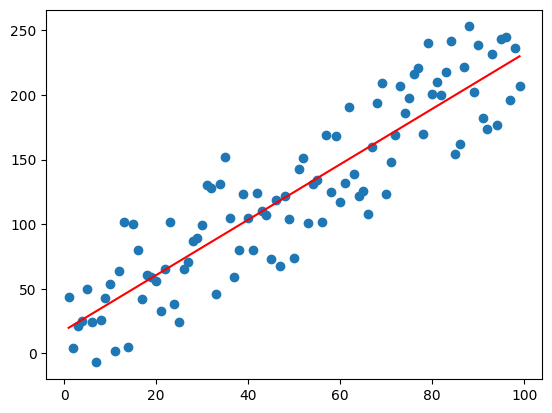

In [ ]:
slope=MSSE(df,'x','y')[1]
intercept = MSSE(df,'x','y')[0]
x_line = np.linspace(df["x"].min(), df["x"].max(), 100)
y_line = slope * x_line + intercept

plt.scatter(df["x"], df["y"])
plt.plot(x_line, y_line, color='red', label=f'Random Line: y = {slope}x + {intercept}')
plt.show()

#part 2 (Classification)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.model_selection import train_test_split

In [199]:
df=pd.read_csv('/content/drive/MyDrive/csai 253/Iris.csv')

In [200]:
Lf=df.drop("Id",axis=1) # Remove unnedded col

In [202]:
Lf.insert(0, 'ones', 1) # Added Col of ones

In [204]:
# Splitting the data to class1 and class2 depending on the Species
class1 = Lf[Lf['Species'] == 'Iris-setosa']
class2 = Lf[Lf['Species'].isin(['Iris-virginica', 'Iris-versicolor'])]

In [205]:
#Removing the Species
class1=class1.drop("Species",axis=1)
class2=class2.drop("Species",axis=1)

In [206]:
#splitting the data into train and test for both classes
train_Class1,test_Class1= train_test_split(class1 ,test_size=0.2, random_state=42)
train_Class2,test_Class2= train_test_split(class2 ,test_size=0.2, random_state=42)

In [207]:
#Multiplying one of them by -1 for the classification
train_Class2=train_Class2*-1

In [209]:
#converting them to a np array
NPtrain_Class1=train_Class1.to_numpy()
NPtrain_Class2=train_Class2.to_numpy()

In [ ]:
#put the two classes training data toghether
fullTrain=np.concatenate((NPtrain_Class1,NPtrain_Class2), axis=0)
fullTrain

In [211]:
def MSSE1(x):
  ones_column = np.ones((x.shape[0], 1), dtype=x.dtype)
  x_T = x.transpose()
  xx_T=np.matmul(x_T,x)
  xfinalInv = np.linalg.inv(xx_T)
  pseudoInv=np.matmul(xfinalInv,x_T)
  w=np.matmul(pseudoInv,ones_column)
  return w

In [212]:
MSSE1(fullTrain)

array([[-0.71101489],
       [ 0.11937926],
       [ 0.47625549],
       [-0.41428179],
       [-0.18001396]])

In [226]:
for i in range(len(test_Class2)):
  test=test_Class2.values[i]
  print(np.dot(test,MSSE1(fullTrain)))

[-1.00826824]
[-1.22178778]
[-1.13871873]
[-0.5577869]
[-0.73060287]
[-0.75493554]
[-1.06828853]
[-1.36323843]
[-0.79160783]
[-0.55048645]
[-1.05739039]
[-0.68370193]
[-1.02704162]
[-1.10970897]
[-1.18679335]
[-0.77725149]
[-0.94992582]
[-0.90804083]
[-0.78411836]
[-0.62427236]
